In [1]:
from keras.datasets import mnist


In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print(f"Training set size : {X_train.shape}")
print(f"Test set size : {X_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
Training set size : (60000, 28, 28)
Test set size : (10000, 28, 28)


In [3]:
import matplotlib.pyplot as plt


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:

X_train=X_train.reshape(60000, 28, 28,1)  #1 for White-black dimension
X_test=X_test.reshape(10000, 28, 28,1)
X_train.shape

(60000, 28, 28, 1)

In [6]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train=X_train.astype("float32")/255  #for normalisation /255
X_test=X_test.astype("float32")/255
X_train.dtype
X_train[0]

In [8]:
from keras.utils import to_categorical

In [9]:
print(y_train[10])

3


In [10]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)


In [11]:
print(y_train[10])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [12]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
X_train,X_val,y_train,y_val=tts(X_train,y_train, test_size=0.2,random_state=0)
X_val

In [14]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten

In [15]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [16]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [17]:
result=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=5,batch_size=128, verbose=0)

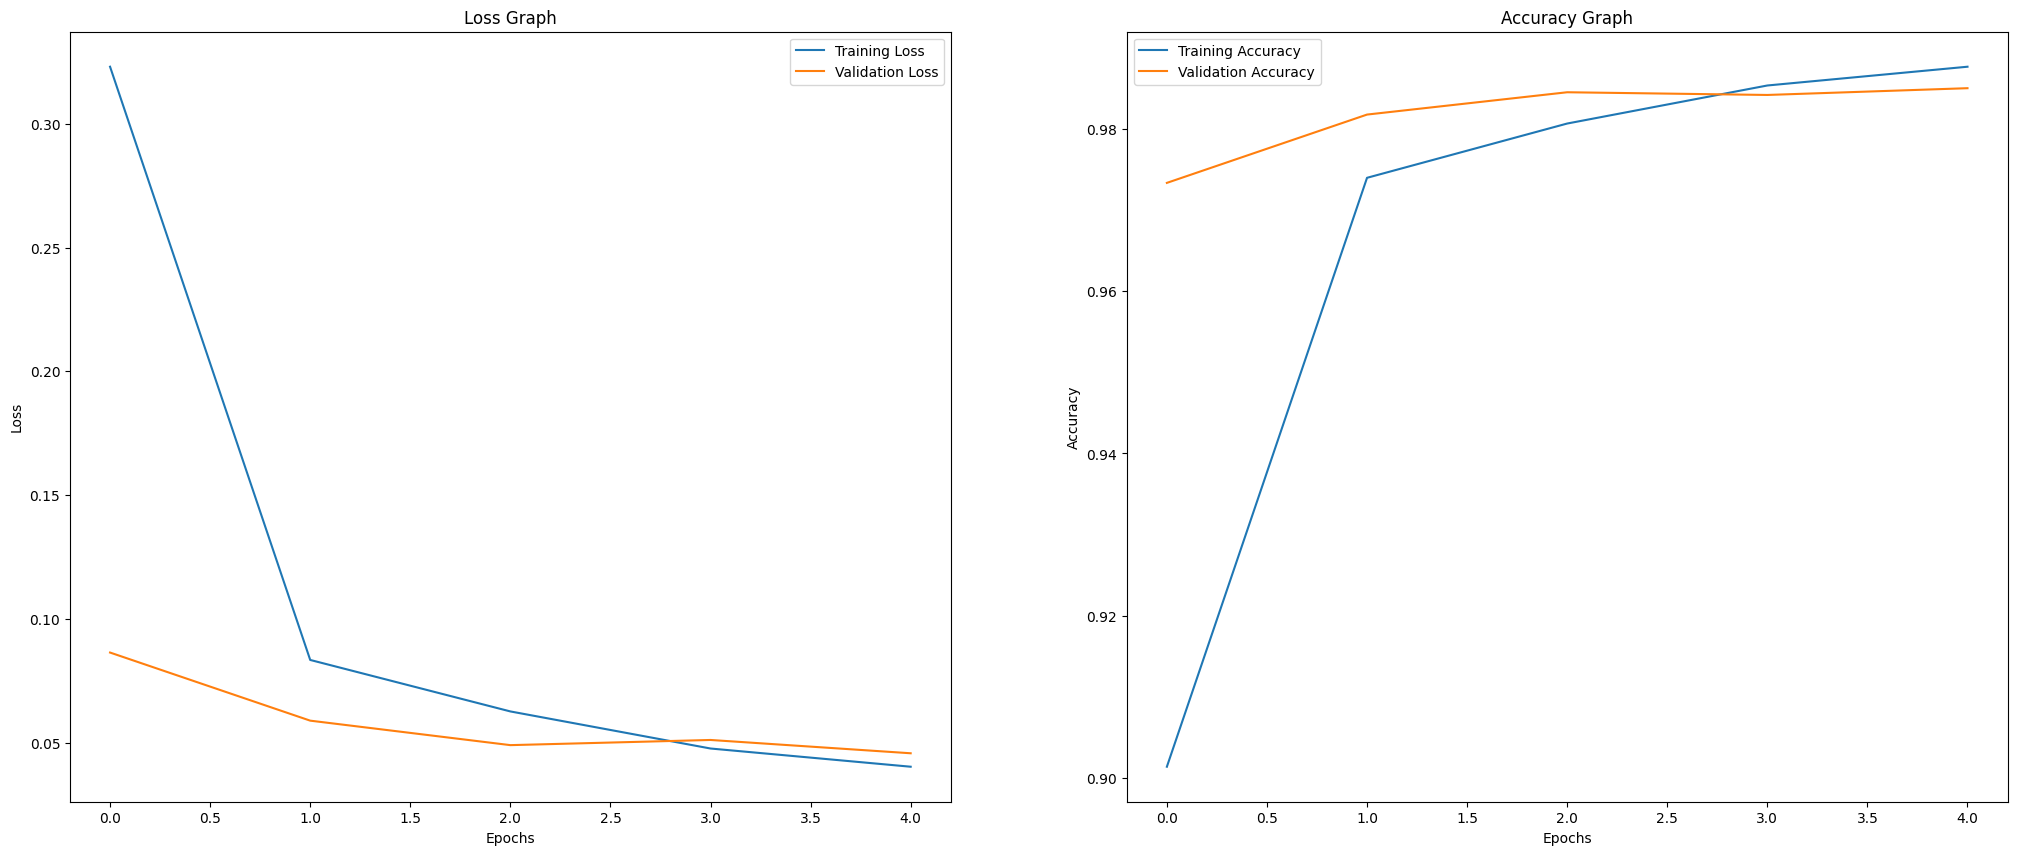

In [18]:
fig,ax= plt.subplots(1,2,figsize=(25,10))

ax[0].plot(result.history["loss"],label="Training Loss")
ax[0].plot(result.history["val_loss"],label="Validation Loss")
ax[0].set_title("Loss Graph")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(result.history["accuracy"],label="Training Accuracy")
ax[1].plot(result.history["val_accuracy"],label="Validation Accuracy")
ax[1].set_title("Accuracy Graph")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()
